In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: ZEC-USD
Start: 2021-01-22 16:30:00+00:00, End: 2021-03-22 15:00:00+00:00
Training data: 1362 
Tsesting data: 1362 


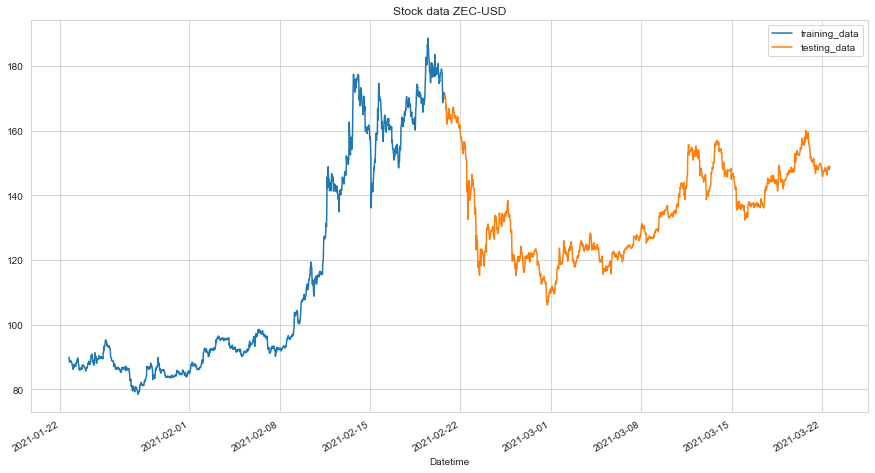

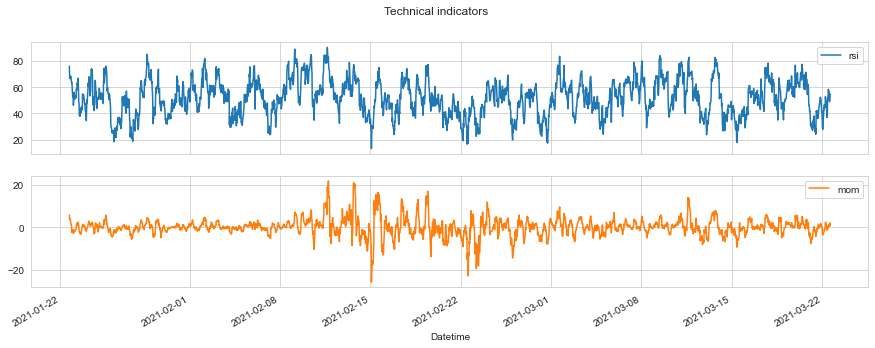

In [2]:
stock_name = 'zec-usd'.upper()
industry = 'Cryptocurrency'
stock_data = pd.read_csv(f'data/{stock_name}.csv', index_col=['Datetime'], parse_dates=True)
n_train = len(stock_data)//2

train_data = stock_data.iloc[:n_train]
test_data = stock_data.iloc[n_train:]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1361.36, duration: 0:00:00.211048
episode: 2/2000, episode end value: 1402.96, duration: 0:00:00.207046
episode: 3/2000, episode end value: 1416.01, duration: 0:00:00.193044
episode: 4/2000, episode end value: 1354.02, duration: 0:00:00.204046
episode: 5/2000, episode end value: 1346.24, duration: 0:00:00.220049
episode: 6/2000, episode end value: 1328.46, duration: 0:00:00.226051
episode: 7/2000, episode end value: 1332.20, duration: 0:00:00.243055
episode: 8/2000, episode end value: 1334.82, duration: 0:00:00.249055
episode: 9/2000, episode end value: 1334.70, duration: 0:00:00.247055
episode: 10/2000, episode end value: 1337.08, duration: 0:00:00.246056
episode: 11/2000, episode end value: 1335.52, duration: 0:00:00.237053
episode: 12/2000, episode end value: 1333.24, duration: 0:00:00.249056
episode: 13/2000, episode end value: 1338.21, duration: 0:00:00.252055
episode: 14/2000, episode end value: 1330.55, duration: 0:00:00.240055
episode: 15/200

episode: 117/2000, episode end value: 1349.34, duration: 0:00:00.211027
episode: 118/2000, episode end value: 1340.76, duration: 0:00:00.216050
episode: 119/2000, episode end value: 1337.52, duration: 0:00:00.230072
episode: 120/2000, episode end value: 1340.68, duration: 0:00:00.243040
episode: 121/2000, episode end value: 1339.29, duration: 0:00:00.224050
episode: 122/2000, episode end value: 1337.14, duration: 0:00:00.233066
episode: 123/2000, episode end value: 1346.93, duration: 0:00:00.216034
episode: 124/2000, episode end value: 1341.97, duration: 0:00:00.222050
episode: 125/2000, episode end value: 1346.37, duration: 0:00:00.213047
episode: 126/2000, episode end value: 1342.45, duration: 0:00:00.208047
episode: 127/2000, episode end value: 1342.72, duration: 0:00:00.218049
episode: 128/2000, episode end value: 1336.54, duration: 0:00:00.215048
episode: 129/2000, episode end value: 1348.29, duration: 0:00:00.209047
episode: 130/2000, episode end value: 1339.78, duration: 0:00:00

episode: 231/2000, episode end value: 1341.80, duration: 0:00:00.279064
episode: 232/2000, episode end value: 1337.74, duration: 0:00:00.273060
episode: 233/2000, episode end value: 1329.74, duration: 0:00:00.310070
episode: 234/2000, episode end value: 1329.09, duration: 0:00:00.272060
episode: 235/2000, episode end value: 1334.16, duration: 0:00:00.261058
episode: 236/2000, episode end value: 1340.19, duration: 0:00:00.254058
episode: 237/2000, episode end value: 1331.28, duration: 0:00:00.261056
episode: 238/2000, episode end value: 1331.27, duration: 0:00:00.258058
episode: 239/2000, episode end value: 1334.62, duration: 0:00:00.259059
episode: 240/2000, episode end value: 1327.33, duration: 0:00:00.237052
episode: 241/2000, episode end value: 1326.81, duration: 0:00:00.247056
episode: 242/2000, episode end value: 1336.57, duration: 0:00:00.268060
episode: 243/2000, episode end value: 1334.25, duration: 0:00:00.236054
episode: 244/2000, episode end value: 1343.39, duration: 0:00:00

episode: 345/2000, episode end value: 1335.82, duration: 0:00:00.252057
episode: 346/2000, episode end value: 1329.92, duration: 0:00:00.251070
episode: 347/2000, episode end value: 1337.29, duration: 0:00:00.246040
episode: 348/2000, episode end value: 1333.36, duration: 0:00:00.234054
episode: 349/2000, episode end value: 1337.66, duration: 0:00:00.256056
episode: 350/2000, episode end value: 1349.21, duration: 0:00:00.229051
episode: 351/2000, episode end value: 1340.26, duration: 0:00:00.239055
episode: 352/2000, episode end value: 1327.68, duration: 0:00:00.237071
episode: 353/2000, episode end value: 1335.54, duration: 0:00:00.229043
episode: 354/2000, episode end value: 1335.31, duration: 0:00:00.234043
episode: 355/2000, episode end value: 1346.15, duration: 0:00:00.247056
episode: 356/2000, episode end value: 1349.32, duration: 0:00:00.241058
episode: 357/2000, episode end value: 1351.52, duration: 0:00:00.238053
episode: 358/2000, episode end value: 1332.78, duration: 0:00:00

episode: 459/2000, episode end value: 1344.34, duration: 0:00:00.257060
episode: 460/2000, episode end value: 1335.44, duration: 0:00:00.281060
episode: 461/2000, episode end value: 1334.05, duration: 0:00:00.294078
episode: 462/2000, episode end value: 1333.09, duration: 0:00:00.261037
episode: 463/2000, episode end value: 1333.52, duration: 0:00:00.266059
episode: 464/2000, episode end value: 1336.50, duration: 0:00:00.288064
episode: 465/2000, episode end value: 1332.58, duration: 0:00:00.256054
episode: 466/2000, episode end value: 1336.11, duration: 0:00:00.268060
episode: 467/2000, episode end value: 1330.51, duration: 0:00:00.285064
episode: 468/2000, episode end value: 1333.76, duration: 0:00:00.272061
episode: 469/2000, episode end value: 1332.49, duration: 0:00:00.265060
episode: 470/2000, episode end value: 1341.58, duration: 0:00:00.255056
episode: 471/2000, episode end value: 1331.41, duration: 0:00:00.280063
episode: 472/2000, episode end value: 1349.02, duration: 0:00:00

episode: 573/2000, episode end value: 1328.31, duration: 0:00:00.262059
episode: 574/2000, episode end value: 1328.93, duration: 0:00:00.283063
episode: 575/2000, episode end value: 1340.78, duration: 0:00:00.274064
episode: 576/2000, episode end value: 1323.41, duration: 0:00:00.300065
episode: 577/2000, episode end value: 1332.97, duration: 0:00:00.257058
episode: 578/2000, episode end value: 1334.70, duration: 0:00:00.260058
episode: 579/2000, episode end value: 1325.81, duration: 0:00:00.274061
episode: 580/2000, episode end value: 1332.79, duration: 0:00:00.267057
episode: 581/2000, episode end value: 1331.36, duration: 0:00:00.278062
episode: 582/2000, episode end value: 1319.02, duration: 0:00:00.296068
episode: 583/2000, episode end value: 1330.78, duration: 0:00:00.273062
episode: 584/2000, episode end value: 1345.41, duration: 0:00:00.263057
episode: 585/2000, episode end value: 1333.94, duration: 0:00:00.282063
episode: 586/2000, episode end value: 1332.88, duration: 0:00:00

episode: 687/2000, episode end value: 1326.96, duration: 0:00:00.289081
episode: 688/2000, episode end value: 1326.84, duration: 0:00:00.268043
episode: 689/2000, episode end value: 1308.42, duration: 0:00:00.279063
episode: 690/2000, episode end value: 1329.01, duration: 0:00:00.280061
episode: 691/2000, episode end value: 1343.43, duration: 0:00:00.270061
episode: 692/2000, episode end value: 1342.31, duration: 0:00:00.259060
episode: 693/2000, episode end value: 1327.42, duration: 0:00:00.275058
episode: 694/2000, episode end value: 1327.39, duration: 0:00:00.297069
episode: 695/2000, episode end value: 1323.82, duration: 0:00:00.297063
episode: 696/2000, episode end value: 1328.00, duration: 0:00:00.263064
episode: 697/2000, episode end value: 1328.63, duration: 0:00:00.287064
episode: 698/2000, episode end value: 1329.31, duration: 0:00:00.281061
episode: 699/2000, episode end value: 1330.76, duration: 0:00:00.283065
episode: 700/2000, episode end value: 1335.88, duration: 0:00:00

episode: 801/2000, episode end value: 1318.19, duration: 0:00:00.341078
episode: 802/2000, episode end value: 1322.70, duration: 0:00:00.259056
episode: 803/2000, episode end value: 1337.83, duration: 0:00:00.295066
episode: 804/2000, episode end value: 1323.89, duration: 0:00:00.287065
episode: 805/2000, episode end value: 1318.82, duration: 0:00:00.332075
episode: 806/2000, episode end value: 1333.29, duration: 0:00:00.294070
episode: 807/2000, episode end value: 1320.18, duration: 0:00:00.304067
episode: 808/2000, episode end value: 1309.15, duration: 0:00:00.292066
episode: 809/2000, episode end value: 1328.40, duration: 0:00:00.306072
episode: 810/2000, episode end value: 1333.83, duration: 0:00:00.282058
episode: 811/2000, episode end value: 1328.61, duration: 0:00:00.289068
episode: 812/2000, episode end value: 1313.23, duration: 0:00:00.265059
episode: 813/2000, episode end value: 1341.32, duration: 0:00:00.285064
episode: 814/2000, episode end value: 1338.81, duration: 0:00:00

episode: 915/2000, episode end value: 1328.07, duration: 0:00:00.347076
episode: 916/2000, episode end value: 1311.38, duration: 0:00:00.335077
episode: 917/2000, episode end value: 1325.15, duration: 0:00:00.305062
episode: 918/2000, episode end value: 1327.68, duration: 0:00:00.299067
episode: 919/2000, episode end value: 1331.50, duration: 0:00:00.328072
episode: 920/2000, episode end value: 1308.21, duration: 0:00:00.281067
episode: 921/2000, episode end value: 1331.73, duration: 0:00:00.290064
episode: 922/2000, episode end value: 1305.89, duration: 0:00:00.315069
episode: 923/2000, episode end value: 1324.45, duration: 0:00:00.336074
episode: 924/2000, episode end value: 1339.45, duration: 0:00:00.294066
episode: 925/2000, episode end value: 1328.49, duration: 0:00:00.371083
episode: 926/2000, episode end value: 1322.61, duration: 0:00:00.378086
episode: 927/2000, episode end value: 1299.51, duration: 0:00:00.326074
episode: 928/2000, episode end value: 1326.85, duration: 0:00:00

episode: 1029/2000, episode end value: 1320.13, duration: 0:00:00.288064
episode: 1030/2000, episode end value: 1327.56, duration: 0:00:00.288065
episode: 1031/2000, episode end value: 1348.00, duration: 0:00:00.297070
episode: 1032/2000, episode end value: 1332.73, duration: 0:00:00.291061
episode: 1033/2000, episode end value: 1307.72, duration: 0:00:00.274061
episode: 1034/2000, episode end value: 1347.97, duration: 0:00:00.292069
episode: 1035/2000, episode end value: 1331.97, duration: 0:00:00.292064
episode: 1036/2000, episode end value: 1323.79, duration: 0:00:00.306068
episode: 1037/2000, episode end value: 1344.56, duration: 0:00:00.289067
episode: 1038/2000, episode end value: 1330.48, duration: 0:00:00.294064
episode: 1039/2000, episode end value: 1332.73, duration: 0:00:00.278058
episode: 1040/2000, episode end value: 1325.89, duration: 0:00:00.294073
episode: 1041/2000, episode end value: 1348.97, duration: 0:00:00.292059
episode: 1042/2000, episode end value: 1337.55, dur

episode: 1142/2000, episode end value: 1324.01, duration: 0:00:00.291066
episode: 1143/2000, episode end value: 1321.30, duration: 0:00:00.294065
episode: 1144/2000, episode end value: 1316.30, duration: 0:00:00.282063
episode: 1145/2000, episode end value: 1328.61, duration: 0:00:00.286065
episode: 1146/2000, episode end value: 1331.65, duration: 0:00:00.298068
episode: 1147/2000, episode end value: 1339.57, duration: 0:00:00.295062
episode: 1148/2000, episode end value: 1351.01, duration: 0:00:00.312067
episode: 1149/2000, episode end value: 1328.65, duration: 0:00:00.285065
episode: 1150/2000, episode end value: 1337.26, duration: 0:00:00.279064
episode: 1151/2000, episode end value: 1326.94, duration: 0:00:00.320072
episode: 1152/2000, episode end value: 1340.58, duration: 0:00:00.285058
episode: 1153/2000, episode end value: 1308.37, duration: 0:00:00.288065
episode: 1154/2000, episode end value: 1312.48, duration: 0:00:00.300067
episode: 1155/2000, episode end value: 1326.92, dur

episode: 1255/2000, episode end value: 1351.71, duration: 0:00:00.346078
episode: 1256/2000, episode end value: 1351.23, duration: 0:00:00.355079
episode: 1257/2000, episode end value: 1326.08, duration: 0:00:00.325077
episode: 1258/2000, episode end value: 1306.58, duration: 0:00:00.388085
episode: 1259/2000, episode end value: 1331.46, duration: 0:00:00.357081
episode: 1260/2000, episode end value: 1326.10, duration: 0:00:00.393087
episode: 1261/2000, episode end value: 1327.38, duration: 0:00:00.353084
episode: 1262/2000, episode end value: 1310.72, duration: 0:00:00.333075
episode: 1263/2000, episode end value: 1307.30, duration: 0:00:00.334076
episode: 1264/2000, episode end value: 1320.33, duration: 0:00:00.321070
episode: 1265/2000, episode end value: 1313.95, duration: 0:00:00.404095
episode: 1266/2000, episode end value: 1304.46, duration: 0:00:00.406107
episode: 1267/2000, episode end value: 1337.58, duration: 0:00:00.403096
episode: 1268/2000, episode end value: 1328.11, dur

episode: 1368/2000, episode end value: 1334.99, duration: 0:00:00.333078
episode: 1369/2000, episode end value: 1329.34, duration: 0:00:00.358081
episode: 1370/2000, episode end value: 1321.07, duration: 0:00:00.341074
episode: 1371/2000, episode end value: 1320.41, duration: 0:00:00.303064
episode: 1372/2000, episode end value: 1342.90, duration: 0:00:00.339077
episode: 1373/2000, episode end value: 1331.04, duration: 0:00:00.366080
episode: 1374/2000, episode end value: 1316.01, duration: 0:00:00.360081
episode: 1375/2000, episode end value: 1327.70, duration: 0:00:00.390089
episode: 1376/2000, episode end value: 1329.62, duration: 0:00:00.399092
episode: 1377/2000, episode end value: 1305.27, duration: 0:00:00.307068
episode: 1378/2000, episode end value: 1314.41, duration: 0:00:00.364082
episode: 1379/2000, episode end value: 1318.48, duration: 0:00:00.353078
episode: 1380/2000, episode end value: 1324.72, duration: 0:00:00.336081
episode: 1381/2000, episode end value: 1307.56, dur

episode: 1481/2000, episode end value: 1324.52, duration: 0:00:00.301068
episode: 1482/2000, episode end value: 1332.93, duration: 0:00:00.318072
episode: 1483/2000, episode end value: 1308.80, duration: 0:00:00.314067
episode: 1484/2000, episode end value: 1316.24, duration: 0:00:00.295066
episode: 1485/2000, episode end value: 1318.72, duration: 0:00:00.294066
episode: 1486/2000, episode end value: 1327.44, duration: 0:00:00.279062
episode: 1487/2000, episode end value: 1324.12, duration: 0:00:00.330074
episode: 1488/2000, episode end value: 1306.51, duration: 0:00:00.351077
episode: 1489/2000, episode end value: 1333.60, duration: 0:00:00.311071
episode: 1490/2000, episode end value: 1313.80, duration: 0:00:00.273054
episode: 1491/2000, episode end value: 1338.54, duration: 0:00:00.296071
episode: 1492/2000, episode end value: 1329.97, duration: 0:00:00.286061
episode: 1493/2000, episode end value: 1322.93, duration: 0:00:00.266060
episode: 1494/2000, episode end value: 1324.82, dur

episode: 1594/2000, episode end value: 1340.42, duration: 0:00:00.277702
episode: 1595/2000, episode end value: 1330.43, duration: 0:00:00.287063
episode: 1596/2000, episode end value: 1332.87, duration: 0:00:00.278073
episode: 1597/2000, episode end value: 1348.51, duration: 0:00:00.261995
episode: 1598/2000, episode end value: 1334.82, duration: 0:00:00.278366
episode: 1599/2000, episode end value: 1337.78, duration: 0:00:00.283065
episode: 1600/2000, episode end value: 1329.46, duration: 0:00:00.271060
episode: 1601/2000, episode end value: 1326.64, duration: 0:00:00.277062
episode: 1602/2000, episode end value: 1329.05, duration: 0:00:00.295064
episode: 1603/2000, episode end value: 1320.33, duration: 0:00:00.276062
episode: 1604/2000, episode end value: 1309.82, duration: 0:00:00.284062
episode: 1605/2000, episode end value: 1323.24, duration: 0:00:00.289064
episode: 1606/2000, episode end value: 1323.94, duration: 0:00:00.270061
episode: 1607/2000, episode end value: 1318.19, dur

episode: 1707/2000, episode end value: 1329.28, duration: 0:00:00.268059
episode: 1708/2000, episode end value: 1338.28, duration: 0:00:00.275060
episode: 1709/2000, episode end value: 1311.75, duration: 0:00:00.256054
episode: 1710/2000, episode end value: 1315.07, duration: 0:00:00.286071
episode: 1711/2000, episode end value: 1341.61, duration: 0:00:00.269059
episode: 1712/2000, episode end value: 1333.11, duration: 0:00:00.338087
episode: 1713/2000, episode end value: 1350.87, duration: 0:00:00.275067
episode: 1714/2000, episode end value: 1336.78, duration: 0:00:00.289064
episode: 1715/2000, episode end value: 1304.58, duration: 0:00:00.294067
episode: 1716/2000, episode end value: 1324.28, duration: 0:00:00.269076
episode: 1717/2000, episode end value: 1306.43, duration: 0:00:00.276045
episode: 1718/2000, episode end value: 1310.35, duration: 0:00:00.270060
episode: 1719/2000, episode end value: 1346.75, duration: 0:00:00.273062
episode: 1720/2000, episode end value: 1331.94, dur

episode: 1820/2000, episode end value: 1326.88, duration: 0:00:00.298070
episode: 1821/2000, episode end value: 1314.72, duration: 0:00:00.295063
episode: 1822/2000, episode end value: 1333.62, duration: 0:00:00.285062
episode: 1823/2000, episode end value: 1312.90, duration: 0:00:00.272064
episode: 1824/2000, episode end value: 1348.14, duration: 0:00:00.261058
episode: 1825/2000, episode end value: 1322.61, duration: 0:00:00.295069
episode: 1826/2000, episode end value: 1347.41, duration: 0:00:00.280060
episode: 1827/2000, episode end value: 1326.49, duration: 0:00:00.281595
episode: 1828/2000, episode end value: 1319.45, duration: 0:00:00.283958
episode: 1829/2000, episode end value: 1333.75, duration: 0:00:00.285065
episode: 1830/2000, episode end value: 1349.56, duration: 0:00:00.294069
episode: 1831/2000, episode end value: 1333.08, duration: 0:00:00.288060
episode: 1832/2000, episode end value: 1309.98, duration: 0:00:00.275062
episode: 1833/2000, episode end value: 1316.00, dur

episode: 1933/2000, episode end value: 1338.15, duration: 0:00:00.278062
episode: 1934/2000, episode end value: 1314.16, duration: 0:00:00.272063
episode: 1935/2000, episode end value: 1311.84, duration: 0:00:00.251058
episode: 1936/2000, episode end value: 1318.40, duration: 0:00:00.264057
episode: 1937/2000, episode end value: 1342.23, duration: 0:00:00.280097
episode: 1938/2000, episode end value: 1305.88, duration: 0:00:00.308068
episode: 1939/2000, episode end value: 1327.43, duration: 0:00:00.263845
episode: 1940/2000, episode end value: 1329.93, duration: 0:00:00.265247
episode: 1941/2000, episode end value: 1302.67, duration: 0:00:00.271452
episode: 1942/2000, episode end value: 1350.70, duration: 0:00:00.261358
episode: 1943/2000, episode end value: 1303.65, duration: 0:00:00.273060
episode: 1944/2000, episode end value: 1332.92, duration: 0:00:00.260061
episode: 1945/2000, episode end value: 1317.12, duration: 0:00:00.268058
episode: 1946/2000, episode end value: 1333.31, dur

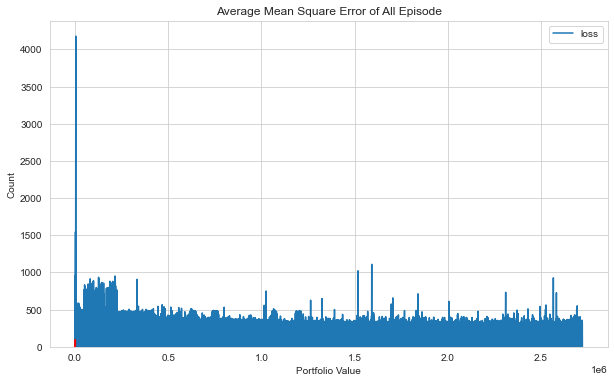

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

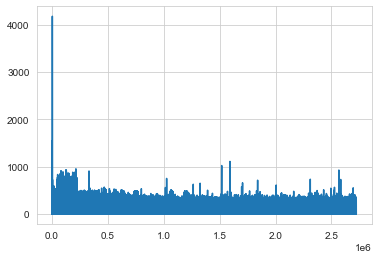

In [5]:
plt.plot(agent.model.losses)

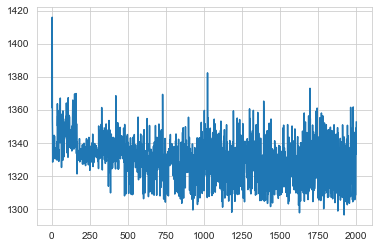

In [6]:
plt.plot(portfolio_value)

episode end value: 1049.29, duration: 0:00:00.310069
Sell: 676 times, Buy: 685 times


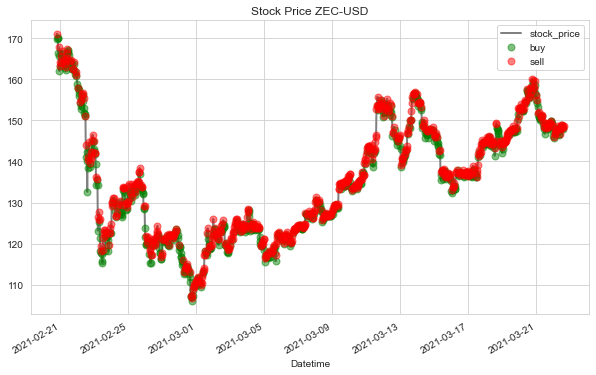

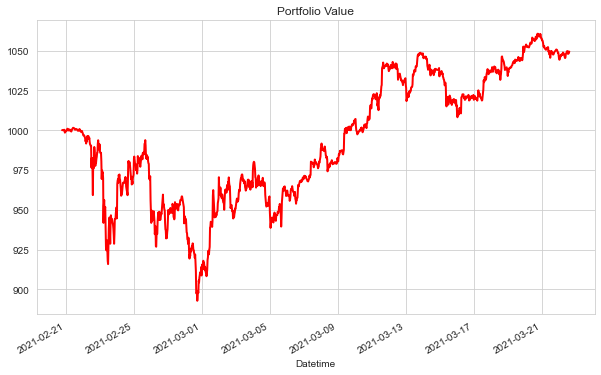

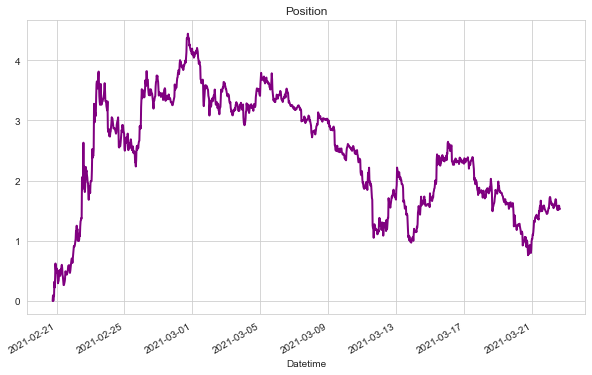

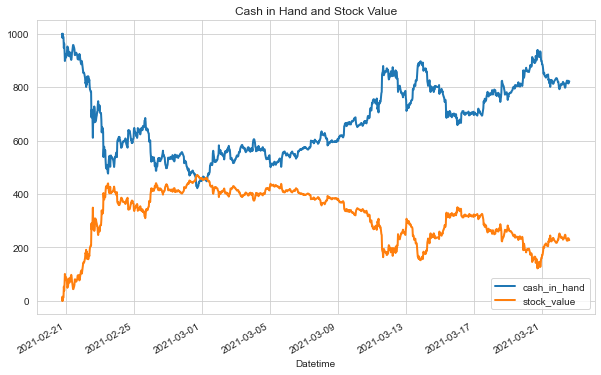

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: ZEC-USD
Start: 2021-02-20 18:30:00+00:00  End: 2021-03-22 15:00:00+00:00
Compound Annual Growth Rate: 0.89 %
Volatility: 0.0504
shape ratio: -0.0409
Maximun drawdown: -10.84 %
Calmar ratio: 0.0825
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -2.53 %
Volatility (benchmark): 0.1419
shape ratio: -0.2556
Maximun drawdown: -38.02 %
Calmar ratio (benchmark): -0.0665


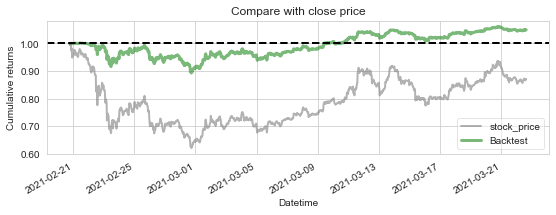

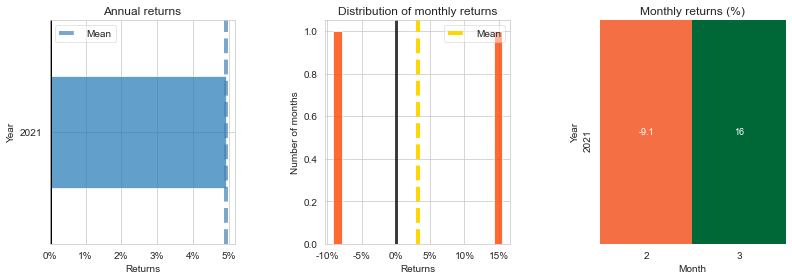

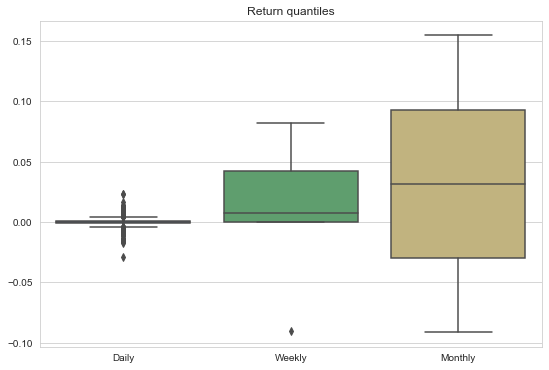

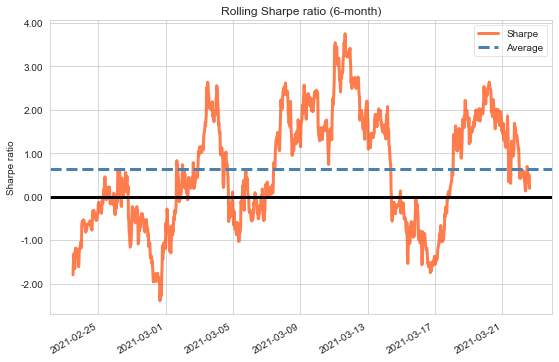

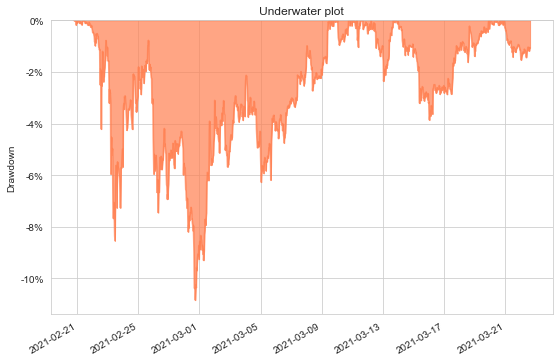

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')